<a href="https://colab.research.google.com/github/Dimitri-Code56/network_analysis/blob/main/Network_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from matplotlib import cm
import matplotlib
import numpy as np
import seaborn as sns
from networkx.algorithms import community


In [2]:
!pip install pyvis

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 7.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [3]:
!pip install networkx

In [94]:
from pyvis.network import Network
import pyvis
from IPython.core.display import display, HTML
import networkx as nx
import random
from pyvis import network as net
import matplotlib.colors as mcolors

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/Network Analysy/global_arms_transfer_2000_2023.csv'

In [7]:
df = pd.read_csv(file_path)
df = df.dropna()


In [8]:
df.shape

(8371, 15)

In [9]:
df.head()

,id,trade_id,target,source,order_date,orderYrEst,quantity,delivery_date,designation,description,category,source_lat,source_lng,target_lat,target_lng
0,230885,551,Kyrgyzstan,Russia,2005-01-01 00:00:00+00:00,True,1.0,2005-01-01 00:00:00+00:00,Mi-17,transport helicopter,Aircraft,64.774657,98.105107,41.528863,74.636524
2,272485,2511,Paraguay,Spain,2003-01-01 00:00:00+00:00,False,1.0,2004-01-01 00:00:00+00:00,C-212,transport aircraft,Aircraft,40.434162,-3.614563,-23.297918,-58.365255
3,273685,3509,Greece,United States,2003-01-01 00:00:00+00:00,False,4.0,2007-01-01 00:00:00+00:00,APG-78 Longbow,combat heli radar,Sensors,38.893651,-77.170630,39.124398,22.720532
5,309510,4639,China,Germany,2000-01-01 00:00:00+00:00,True,48.0,2006-01-01 00:00:00+00:00,ship engine 1001-2500,ship engine,Engines,51.247366,10.298068,37.594298,104.209271
6,254003,4842,Indonesia,France,2004-01-01 00:00:00+00:00,True,30.0,2010-01-01 00:00:00+00:00,Exocet-40,anti-ship missile,Missiles,44.349371,-1.328556,-2.234137,117.431827


In [99]:
  G = nx.MultiDiGraph()  # Use MultiDiGraph para grafos direcionados, ou MultiGraph para não direcionados

  for index, row in df.iterrows():
      # Adicione cada ataque como uma aresta separada no MultiGraph
      G.add_edge(row['source'], row['target'], weight=row['quantity'])


In [101]:
# Função para gerar uma lista de cores distintas
def distinct_colors(num_colors):
    colors = plt.get_cmap('tab20').colors  # Obtém cores distintas do colormap 'tab20'
    return colors[:num_colors]  # Retorna o número necessário de cores


# Gerar uma lista de cores distintas
num_nodes = len(G.nodes())
colors = distinct_colors(num_nodes)

# Mapear cada nó a uma cor distinta
color_map = {node: colors[i % len(colors)] for i, node in enumerate(G.nodes())}

# Criar o grafo PyVis
nt = Network('1000px', '1000px', notebook=True, cdn_resources='in_line', directed=True)

# Adicionar nós ao grafo com cores distintas
for node in G.nodes():
    color = color_map[node]
    nt.add_node(node, color=matplotlib.colors.to_hex(color))  # Converte a cor para hexadecimal

# Adicionar arestas com cores baseadas na cor do nó de origem
for u, v, data in G.edges(data=True):
    edge_color = color_map.get(u, '#cccccc')  # Cor padrão se não especificada
    nt.add_edge(u, v, value='quantity', color=edge_color)

# Mostrar botões de física e salvar o grafo
nt.show_buttons(filter_=['physics'])
nt.show('comercio_todos.html')

# Exibir o HTML no notebook
from IPython.display import HTML
display(HTML('comercio_todos.html'))

comercio_todos.html


##Matriz, diametro e periferia

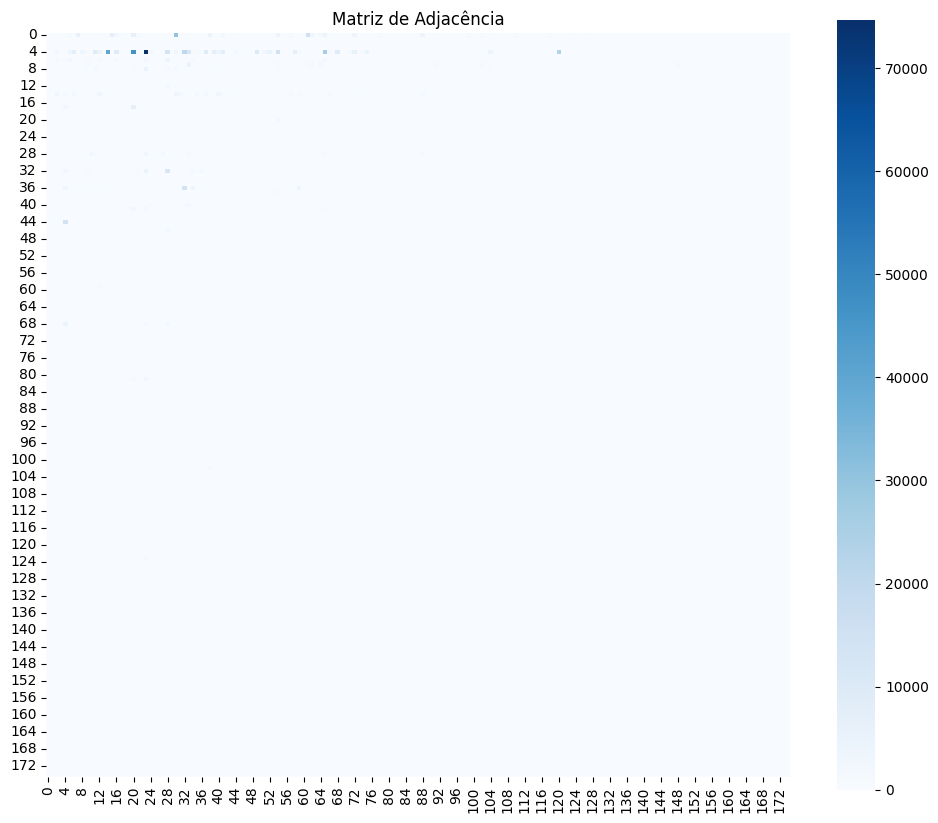

In [102]:
def plot_heatmap_adjacency_matrix(G):
    adj_matrix = nx.adjacency_matrix(G).todense()
    adj_matrix = np.array(adj_matrix)

    plt.figure(figsize=(12, 10))
    sns.heatmap(adj_matrix, cmap='Blues', cbar=True, square=True)
    plt.title("Matriz de Adjacência")
    plt.show()

# Exemplo de uso:
plot_heatmap_adjacency_matrix(G)

In [133]:
if isinstance(G, nx.DiGraph) or isinstance(G, nx.MultiDiGraph):
    largest_scc = max(nx.strongly_connected_components(G), key=len)
    G_sub = G.subgraph(largest_scc).copy()
else:
    largest_scc = max(nx.connected_components(G), key=len)
    G_sub = G.subgraph(largest_scc).copy()

# Agora você pode calcular a periferia no subgrafo
periphery = nx.periphery(G_sub)

In [134]:
print(periphery)

['Oman', 'Dominican Republic', 'Brunei']


In [132]:
if isinstance(G, nx.DiGraph) or isinstance(G, nx.MultiDiGraph):
    largest_scc = max(nx.strongly_connected_components(G), key=len)
    G_sub = G.subgraph(largest_scc).copy()
else:
    largest_scc = max(nx.connected_components(G), key=len)
    G_sub = G.subgraph(largest_scc).copy()

# Agora você pode calcular o diâmetro no subgrafo
diameter = nx.diameter(G_sub)
print("Diâmetro do grafo:", diameter)

Diâmetro do grafo: 6


##Comunidade

In [143]:
communities = community.greedy_modularity_communities(G)

In [144]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

In [145]:
nx.set_node_attributes(G, modularity_class, 'modularity_class')

In [146]:
communities

[frozenset({'Algeria',
            'Angola',
            'Armenia',
            'Azerbaijan',
            'Bangladesh',
            'Belarus',
            'Bolivia',
            'Bulgaria',
            'Cambodia',
            'Cameroon',
            'Central African Republic',
            'Chad',
            'China',
            "Cote d'Ivoire",
            'Cyprus',
            'Czechia',
            'DR Congo',
            'Equatorial Guinea',
            'Ethiopia',
            'European Union**',
            'Georgia',
            'Ghana',
            'Hamas (Palestine)*',
            'Houthi rebels (Yemen)*',
            'India',
            'Iran',
            'Kazakhstan',
            'Kenya',
            'Kyrgyzstan',
            'Laos',
            'Maldives',
            'Mali',
            'Mauritius',
            'Moldova',
            'Mongolia',
            'Montenegro',
            'Myanmar',
            'Namibia',
            'Nepal',
            'Nicaragua',
          

In [147]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

In [148]:
us_community = communities_df[communities_df['node'] == 'United States']

# Exibir a comunidade dos Estados Unidos
print(us_community)

            node  modularity_class
4  United States                 1


In [149]:
communities_df

,node,modularity_class
108,Guinea,3
113,Congo,3
90,Luxembourg,3
71,Denmark,3
29,Burundi,3
...,...,...
89,North Korea,0
88,Azerbaijan,0
1,Kyrgyzstan,0
86,Bolivia,0


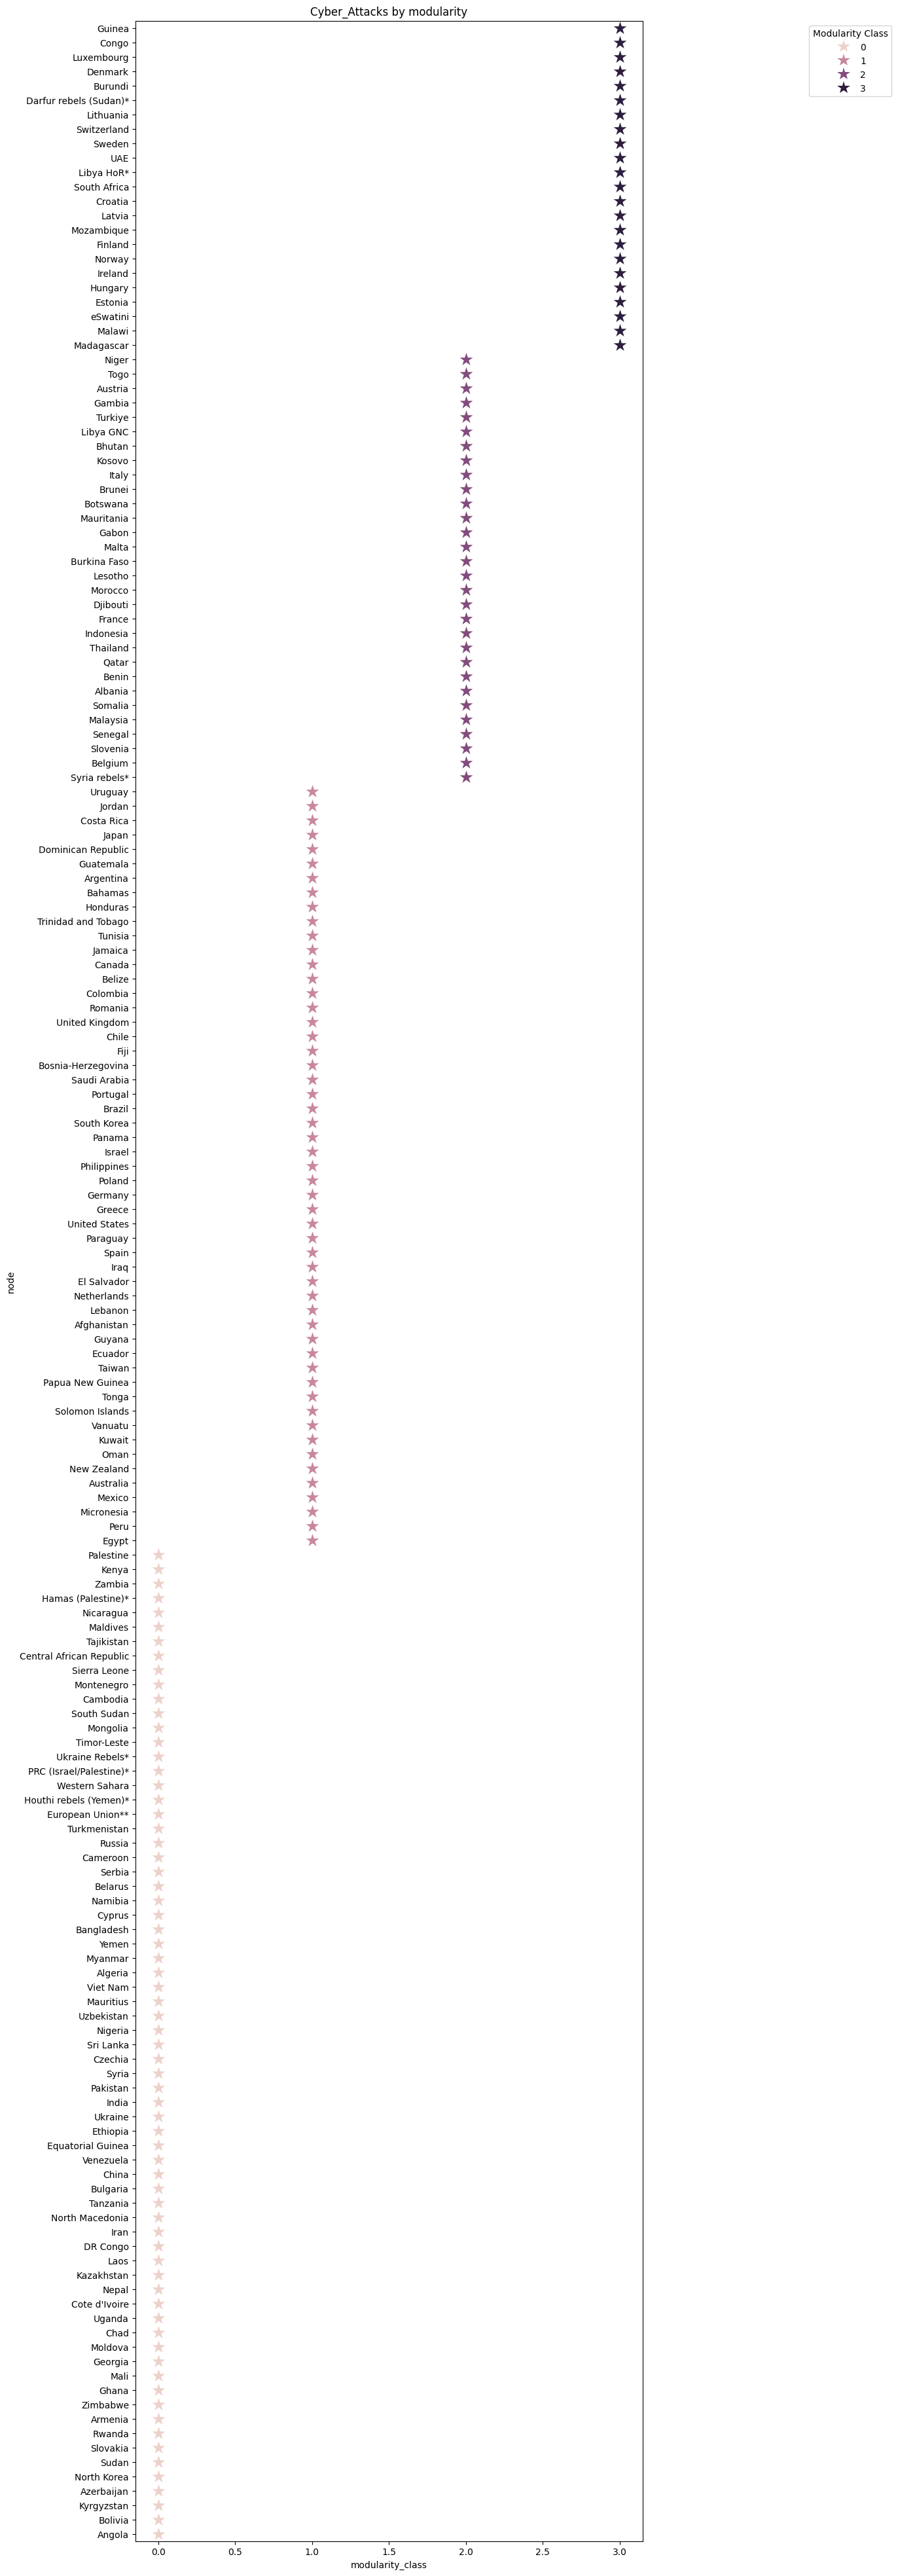

In [150]:
plt.figure(figsize=(10,50))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Cyber_Attacks by modularity")
plt.show()

##Metricas

###Betweenes Centrality

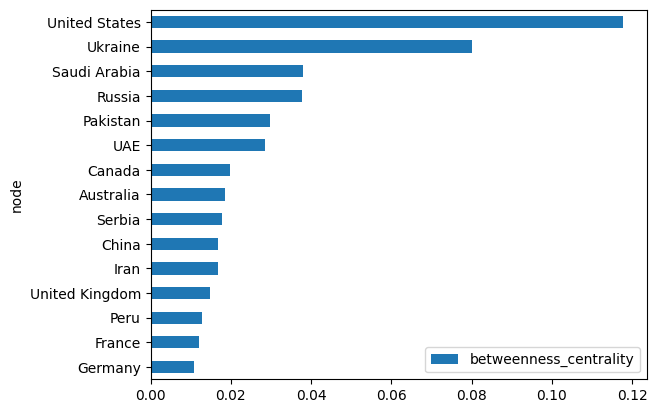

In [189]:
def compute_and_plot_betweenness_centrality(G):
    # Converter para grafo simples se necessário


    # Calcular a Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(G)

    # Adicionar Betweenness Centrality como atributo dos nós
    nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')

    # Criar DataFrame e exibir
    betweenness_df = pd.DataFrame(G.nodes(data='betweenness_centrality'), columns=['node', 'betweenness_centrality'])
    betweenness_df = betweenness_df.sort_values(by='betweenness_centrality', ascending=False)

    num_nodes_to_inspect = 15
    betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness_centrality', kind='barh').invert_yaxis()

    plt.show()

# Exemplo de uso:
compute_and_plot_betweenness_centrality(G)


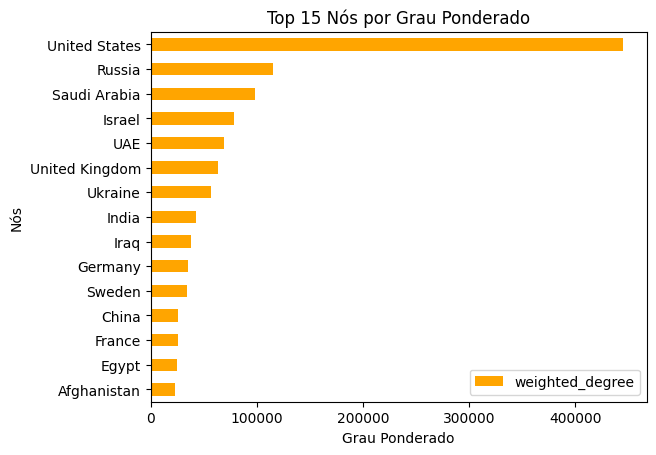

In [193]:
def compute_and_plot_weighted_degree(G, weight='weight', top_n=15):


    # Calcular o grau ponderado
    weighted_degrees = dict(nx.degree(G, weight=weight))

    # Adicionar grau ponderado como atributo dos nós
    nx.set_node_attributes(G, weighted_degrees, 'weighted_degree')

    # Criar DataFrame para os graus ponderados
    weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
    weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)

    # Plotar os top N graus ponderados
    weighted_degree_df[:top_n].plot(x='node', y='weighted_degree', color='orange', kind='barh').invert_yaxis()
    plt.title(f'Top {top_n} Nós por Grau Ponderado')
    plt.xlabel('Grau Ponderado')
    plt.ylabel('Nós')
    plt.show()

# Exemplo de uso:
compute_and_plot_weighted_degree(G)

###Matriz de Ajacencia

In [166]:
adjacency_matrix =nx.adjacency_matrix(G)

In [201]:
print(adjacency_matrix.todense())

[[ 0. 92.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


###Componentes Fracamente e Fortemente conectados

In [169]:
def compute_strongly_weakly_connected_components(G):
    if not isinstance(G, nx.DiGraph):
        print("O grafo precisa ser dirigido para calcular componentes conectados fortemente.")
        return

    strongly_connected = list(nx.strongly_connected_components(G))
    weakly_connected = list(nx.weakly_connected_components(G))

    print(f"Componentes Conectados Fortemente: {strongly_connected}")
    print(f"Componentes Conectados Fracamente: {weakly_connected}")


compute_strongly_weakly_connected_components(G)

Componentes Conectados Fortemente: [{'Mauritius'}, {'Sri Lanka'}, {'Nepal'}, {'Bhutan'}, {'Myanmar'}, {'Maldives'}, {'Bolivia'}, {'Uruguay'}, {'Ecuador'}, {'Namibia'}, {'Afghanistan'}, {'Mozambique'}, {'Sudan'}, {'Armenia'}, {'Bangladesh'}, {'Cambodia'}, {'Viet Nam'}, {'India'}, {'Guinea'}, {'Burundi'}, {'Turkmenistan'}, {'Gambia'}, {'Burkina Faso'}, {'Philippines'}, {'Iraq'}, {'Kenya'}, {'Ethiopia'}, {'DR Congo'}, {'Cameroon'}, {'Chad'}, {'Nigeria'}, {'Western Sahara'}, {'Algeria'}, {'Mexico'}, {'El Salvador'}, {'Chile'}, {'Honduras'}, {'Guatemala'}, {"Cote d'Ivoire"}, {'Angola'}, {'eSwatini'}, {'Gabon'}, {'Djibouti'}, {'Senegal'}, {'Tanzania'}, {'Mauritania'}, {'Benin'}, {'Yemen'}, {'South Sudan'}, {'Uganda'}, {'Mali'}, {'Equatorial Guinea'}, {'Azerbaijan'}, {'Central African Republic'}, {'Rwanda'}, {'Hungary'}, {'Kuwait'}, {'Syria'}, {'Venezuela'}, {'Houthi rebels (Yemen)*'}, {'Guyana'}, {'Ghana'}, {'Zambia'}, {'Darfur rebels (Sudan)*'}, {'Libya HoR*'}, {'Niger'}, {'Sierra Leone'}, 

###Degree Centrality

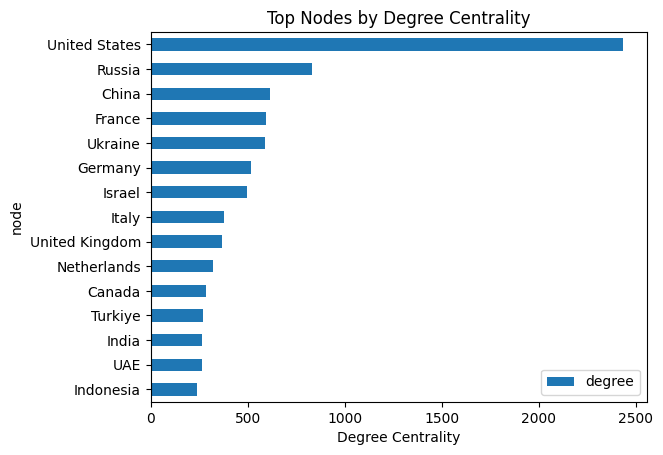

In [196]:
def compute_and_plot_degree_centrality(G, num_nodes_to_inspect=15):
    degrees = dict(nx.degree(G))
    nx.set_node_attributes(G, name='degree', values=degrees)

    degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
    degree_df = degree_df.sort_values(by='degree', ascending=False)


    degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()
    plt.title('Top Nodes by Degree Centrality')
    plt.xlabel('Degree Centrality')
    plt.show()


compute_and_plot_degree_centrality(G)

###Coeficiente de Clustering

Coeficiente de Clustering Global: 0.3119032645360471


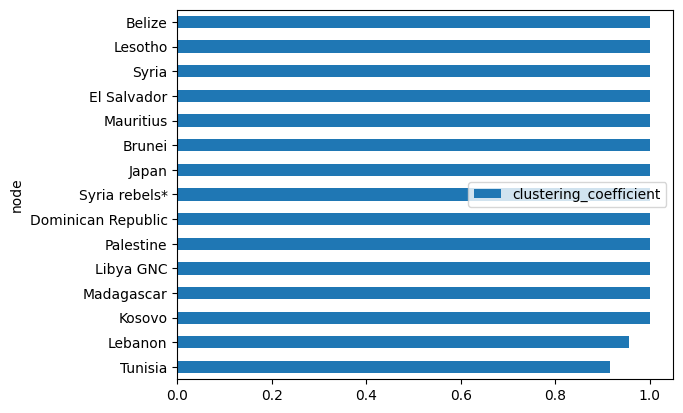

In [197]:
def compute_and_plot_clustering_coefficients(G):

    G_simple = nx.Graph(G)

    local_clustering = nx.clustering(G_simple)
    global_clustering = nx.transitivity(G_simple)

    nx.set_node_attributes(G, local_clustering, 'clustering_coefficient')

    clustering_df = pd.DataFrame(G.nodes(data='clustering_coefficient'), columns=['node', 'clustering_coefficient'])
    clustering_df = clustering_df.sort_values(by='clustering_coefficient', ascending=False)

    num_nodes_to_inspect = 15
    clustering_df[:num_nodes_to_inspect].plot(x='node', y='clustering_coefficient', kind='barh').invert_yaxis()

    print(f"Coeficiente de Clustering Global: {global_clustering}")
    plt.show()


compute_and_plot_clustering_coefficients(G)

###Centralidade de Autovetor

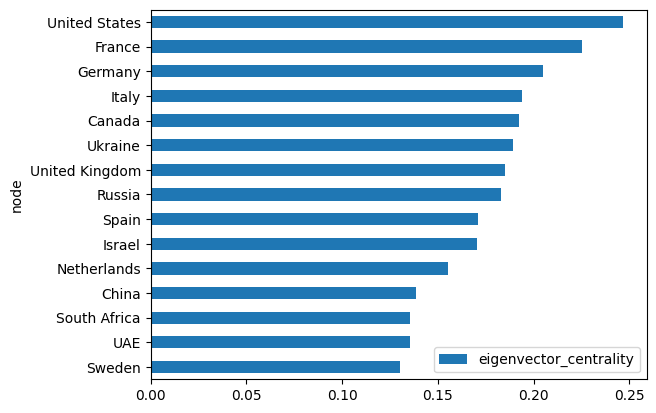

In [198]:
def compute_and_plot_eigenvector_centrality(G):

    G_simple = nx.Graph(G)


    eigenvector_centrality = nx.eigenvector_centrality(G_simple, max_iter=1000, tol=1e-06)


    nx.set_node_attributes(G, eigenvector_centrality, 'eigenvector_centrality')


    eigenvector_df = pd.DataFrame(G.nodes(data='eigenvector_centrality'), columns=['node', 'eigenvector_centrality'])
    eigenvector_df = eigenvector_df.sort_values(by='eigenvector_centrality', ascending=False)

    num_nodes_to_inspect = 15
    eigenvector_df[:num_nodes_to_inspect].plot(x='node', y='eigenvector_centrality', kind='barh').invert_yaxis()

    plt.show()


compute_and_plot_eigenvector_centrality(G)


###Closenes Centrality

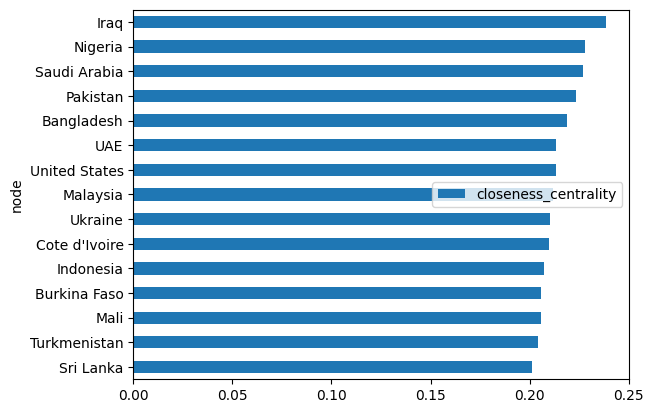

In [199]:
def compute_and_plot_closeness_centrality(G):

    closeness_centrality = nx.closeness_centrality(G)


    nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')

    closeness_df = pd.DataFrame(G.nodes(data='closeness_centrality'), columns=['node', 'closeness_centrality'])
    closeness_df = closeness_df.sort_values(by='closeness_centrality', ascending=False)

    num_nodes_to_inspect = 15
    closeness_df[:num_nodes_to_inspect].plot(x='node', y='closeness_centrality', kind='barh').invert_yaxis()

    plt.show()


compute_and_plot_closeness_centrality(G)

In [200]:
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df

,degree,weighted_degree,betweenness,modularity_class,clustering_coefficient,closeness_centrality,eigenvector_centrality,betweenness_centrality
Russia,830.0,114915.0,0.037632,0.0,0.172043,0.170672,0.182917,0.037632
Kyrgyzstan,18.0,180.0,0.005316,0.0,0.533333,0.137370,0.019353,0.005316
Spain,235.0,8670.0,0.003016,1.0,0.262777,0.155585,0.170831,0.003016
Paraguay,10.0,49.0,0.000000,1.0,0.666667,0.156257,0.021923,0.000000
United States,2434.0,445198.0,0.117743,1.0,0.150557,0.213340,0.246760,0.117743
...,...,...,...,...,...,...,...,...
Fiji,1.0,10.0,0.000000,1.0,0.000000,0.119716,0.002861,0.000000
European Union**,1.0,1.0,0.000000,0.0,0.000000,0.000000,0.001577,0.000000
Panama,1.0,1.0,0.000000,1.0,0.000000,0.000000,0.002196,0.000000
Madagascar,2.0,9.0,0.000000,3.0,1.000000,0.144136,0.007424,0.000000


##Esparsidade, Densidade e Assortatividade da Rede

In [139]:
def compute_assortativity(G):
    assortativity = nx.degree_assortativity_coefficient(G)
    print(f"Assortatividade Geral: {assortativity}")


compute_assortativity(G)

Assortatividade Geral: 0.06834454903266815


In [140]:
def compute_sparsity_density(G):
    density = nx.density(G)
    num_edges = G.number_of_edges()
    num_nodes = G.number_of_nodes()
    max_edges = num_nodes * (num_nodes - 1) if nx.is_directed(G) else num_nodes * (num_nodes - 1) / 2
    sparsity = 1 - density

    print(f"Densidade da Rede: {density}")
    print(f"Esparsidade da Rede: {sparsity}")


compute_sparsity_density(G)

Densidade da Rede: 0.2749096880131363
Esparsidade da Rede: 0.7250903119868637


##Distribuição Empírica de Grau

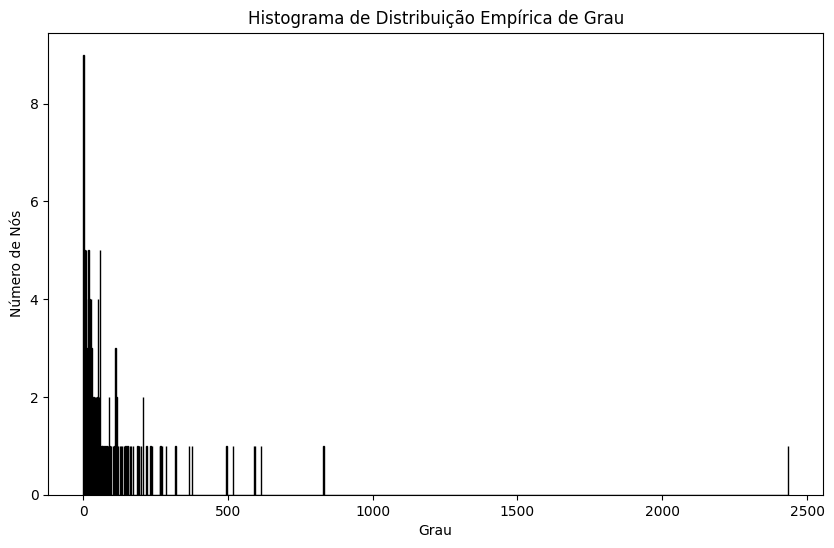

In [138]:
def plot_degree_distribution(G):
    degrees = [d for n, d in G.degree()]
    plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), edgecolor='black')
    plt.title("Histograma de Distribuição Empírica de Grau")
    plt.xlabel("Grau")
    plt.ylabel("Número de Nós")
    plt.show()


plot_degree_distribution(G)

##App Streamlit

https://dimitri-network.streamlit.app/